In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 20
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,0.15,0.3,0.45,0.6,Tree val,Naive
0,0.75,0.75,1.00,1.00,1.00,0.000000
1,0.75,1.00,1.00,0.25,1.00,0.000000
2,0.75,1.00,0.75,0.00,1.00,0.333333
3,1.00,0.50,1.00,1.00,1.00,0.000000
4,1.00,1.00,1.00,0.00,0.75,0.250000
...,...,...,...,...,...,...
15,1.00,1.00,1.00,1.00,0.75,0.250000
16,1.00,1.00,1.00,0.75,1.00,0.333333
17,1.00,1.00,1.00,1.00,0.75,0.000000
18,1.00,1.00,1.00,1.00,0.50,0.500000


In [5]:
length_df

,0.15,0.3,0.45,0.6,Tree val,Naive
0,96.711359,62.540652,45.865664,49.920456,13.035332,1.594477
1,110.517937,89.820606,106.952340,247.752860,6.201075,1.823566
2,15.441919,17.033786,15.477377,289.108920,12.314952,1.494286
3,130.423927,184.635121,166.922719,114.110444,11.769049,2.035480
4,93.135689,80.576134,71.138878,147.857394,58.458858,1.751698
...,...,...,...,...,...,...
15,123.969262,100.685291,52.542340,71.314553,32.981377,2.137090
16,108.697897,115.664581,113.072648,169.530920,7.935546,1.803893
17,43.496064,38.113995,33.824741,59.678777,11.906125,1.788584
18,55.377916,60.331297,66.414522,96.794909,476.528723,1.450974


In [6]:
MSE_df

,0.15,0.3,0.45,0.6,Tree val,Naive
0,25.682410,25.682410,25.531187,25.531187,25.005521,25.005521
1,25.842172,25.842172,25.842172,25.842172,24.306782,24.306782
2,28.472545,28.472545,28.472545,28.472545,27.735967,27.735967
3,28.077742,28.077742,28.077742,28.077742,28.077742,28.077742
4,25.339948,25.339948,25.339948,25.339948,25.339948,25.339948
...,...,...,...,...,...,...
15,26.166473,26.146002,26.146002,26.146002,26.384589,26.384589
16,31.185899,31.185899,31.185899,31.185899,29.079842,29.079842
17,28.143360,28.143360,28.143360,28.143360,28.143360,28.143360
18,28.691051,30.267844,30.267844,28.691051,28.691051,28.691051


In [7]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,300)
        elif metric == "MSE":
            axes[i].set_ylim(0,50)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.15        0.941250
0.3         0.913750
0.45        0.878750
0.6         0.828750
Tree val    0.900833
Naive       0.236667
dtype: float64
Length :
 0.15         95.012425
0.3          98.103496
0.45        102.609895
0.6         107.297189
Tree val           inf
Naive         1.820887
dtype: float64
MSE :
 0.15        28.171002
0.3         28.165950
0.45        28.163589
0.6         28.184125
Tree val    28.011020
Naive       28.011020
dtype: float64


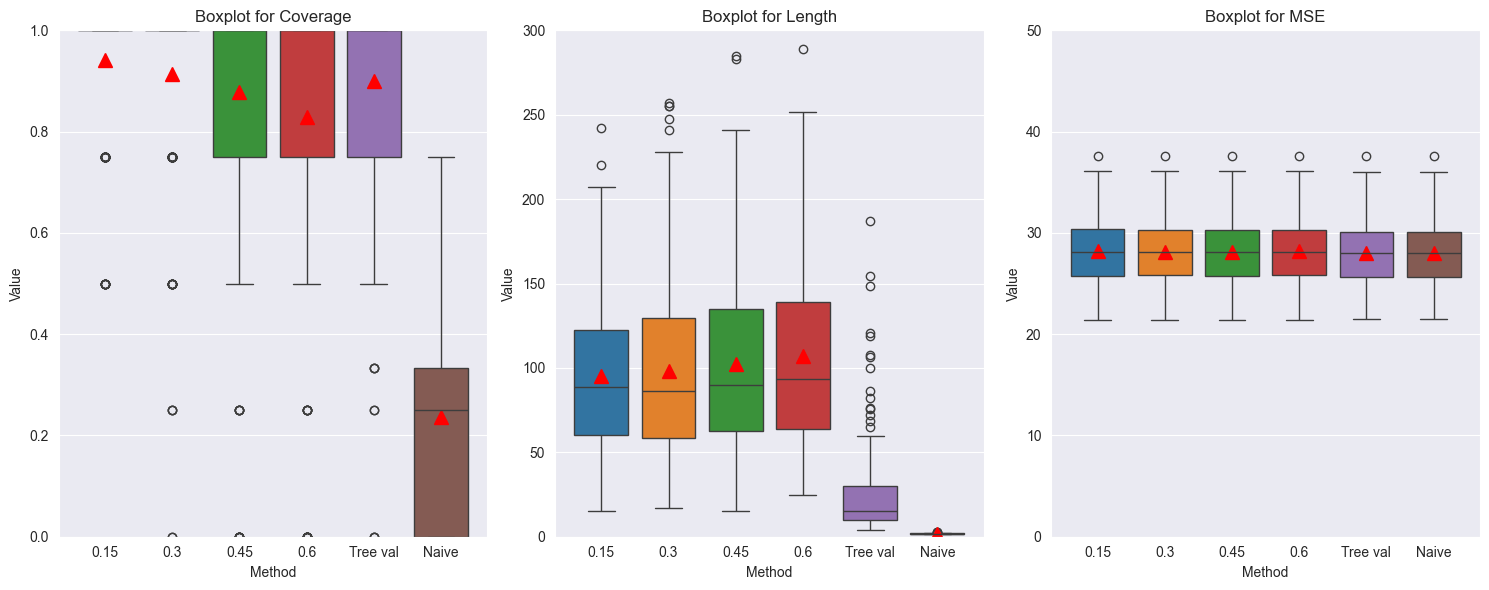

In [8]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])